In [114]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import statsmodels.stats.api as sms
from matplotlib import rcParams
import matplotlib.dates as mdates
import seaborn as sns
import folium

In [115]:
#importing test file
df_test = pd.read_csv('test_results.csv')
df_test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [116]:
#improting user file
df_user = pd.read_csv('user_table.csv')
df_user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [117]:
#checking for missing data and converting timestamp to datetime
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], errors='coerce')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           316800 non-null  int64         
 1   timestamp         311620 non-null  datetime64[ns]
 2   source            316800 non-null  object        
 3   device            316800 non-null  object        
 4   operative_system  316800 non-null  object        
 5   test              316800 non-null  int64         
 6   price             316800 non-null  int64         
 7   converted         316800 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 19.3+ MB


In [118]:
#checking for missing info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [119]:
#join the two datasets on user_id
df=pd.merge(left=df_test, right=df_user, how='left', on='user_id')
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           316800 non-null  int64         
 1   timestamp         311620 non-null  datetime64[ns]
 2   source            316800 non-null  object        
 3   device            316800 non-null  object        
 4   operative_system  316800 non-null  object        
 5   test              316800 non-null  int64         
 6   price             316800 non-null  int64         
 7   converted         316800 non-null  int64         
 8   city              275616 non-null  object        
 9   country           275616 non-null  object        
 10  lat               275616 non-null  float64       
 11  long              275616 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 29.0+ MB


In [121]:
#looking at percentages for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing)

                  Total   Percent
city              41184  0.130000
country           41184  0.130000
lat               41184  0.130000
long              41184  0.130000
timestamp          5180  0.016351
device                0  0.000000
user_id               0  0.000000
source                0  0.000000
converted             0  0.000000
price                 0  0.000000
test                  0  0.000000
operative_system      0  0.000000


The user dataframe did not appear to have any missing data before the merge and the test dataframe seemed to have some missing timestamps. There are still missing timestamps but now also some locations missing as well. This probably means that there were some users in the test dataframe that weren't in the location dataframe, which makes sense because the test dataframe has more enteries. The amount of missing data is miniscular and does not need to be addressed and they can simply be removed. 

In [122]:
df = df.dropna()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271113 entries, 0 to 316799
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           271113 non-null  int64         
 1   timestamp         271113 non-null  datetime64[ns]
 2   source            271113 non-null  object        
 3   device            271113 non-null  object        
 4   operative_system  271113 non-null  object        
 5   test              271113 non-null  int64         
 6   price             271113 non-null  int64         
 7   converted         271113 non-null  int64         
 8   city              271113 non-null  object        
 9   country           271113 non-null  object        
 10  lat               271113 non-null  float64       
 11  long              271113 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 26.9+ MB


In [124]:
#chekcing for duplicate users
df['user_id'].duplicated().value_counts()

user_id
False    271113
Name: count, dtype: int64

In [125]:
#checking to make sure the prices have been assigned correctly
print(df[['user_id','test','price']].groupby(['test','price']).count())

            user_id
test price         
0    39      173316
     59         186
1    39         133
     59       97478


In [126]:
#removing the very few ones that are incorrectly labeled
df=df[((df['test']==0) & (df['price']==39)) | ((df['test']==1) & (df['price']==59))]
print(df[['user_id','test','price']].groupby(['test','price']).count())

            user_id
test price         
0    39      173316
1    59       97478


In [127]:
#checking out the mean and std for the new revenue column 
df['revenue'] = df['converted'] * df['price']
df['revenue'].describe()

count    270794.000000
mean          0.821318
std           6.156816
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          59.000000
Name: revenue, dtype: float64

In [128]:
#getting the map
map = folium.Map(location=[df.lat.mean(), df.long.mean()], zoom_start=34, control_scale=True)

In [129]:
#mapping the data
for index, location in df.iterrows():
    folium.Marker([location["lat"], location["long"]], popup=location["city"]).add_to(map)

#rendering the map in jupyter notebook
map

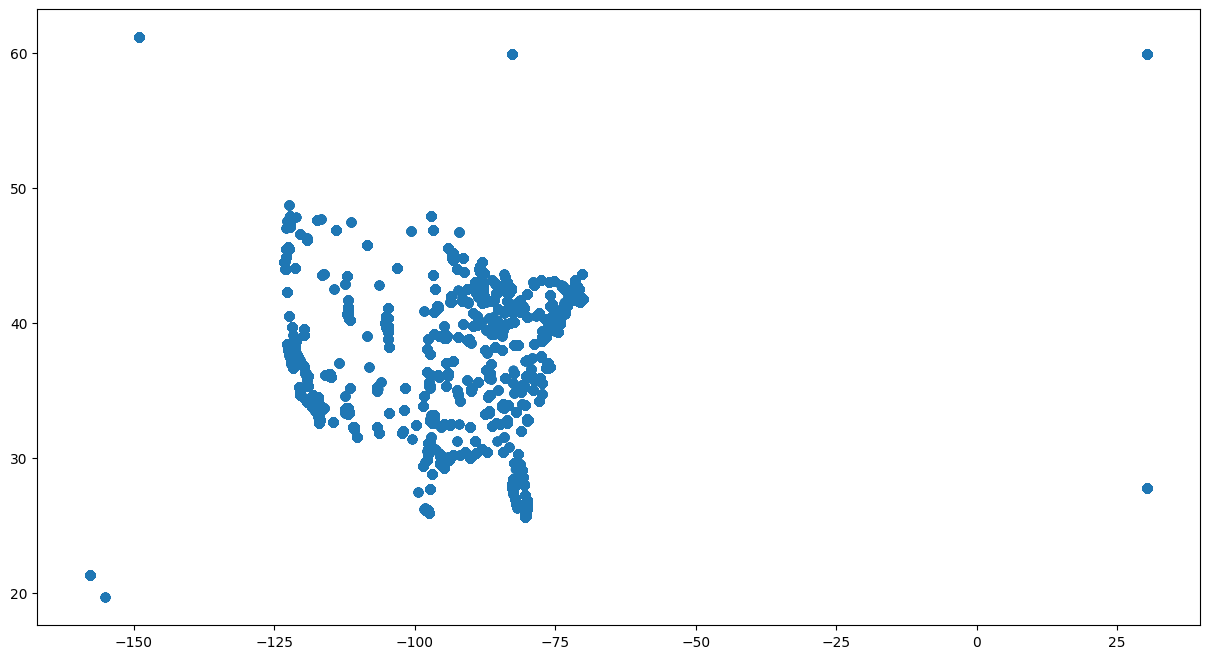

In [130]:
#second way to graph this but without the map outline
plt.figure(figsize=(15,8))
plt.scatter(x = df.long, y = df.lat)
plt.show()

In [131]:
print(df[['converted','test', 'price']].groupby('test').mean())

      converted  price
test                  
0      0.019785   39.0
1      0.015419   59.0


conversion rate dropped

In [132]:
#revenue per test
print(df[['revenue','test']].groupby('test').mean())

       revenue
test          
0     0.771602
1     0.909713


In [133]:
print(ttest_ind(df.query('test==1')['revenue'], df.query('test==0')['revenue'], equal_var=False))

TtestResult(statistic=np.float64(5.1747345786802414), pvalue=np.float64(2.28510823192351e-07), df=np.float64(159448.21651715017))


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'ads_facebook'),
  Text(1, 0, 'seo-google'),
  Text(2, 0, 'ads-bing'),
  Text(3, 0, 'direct_traffic'),
  Text(4, 0, 'ads-google'),
  Text(5, 0, 'friend_referral'),
  Text(6, 0, 'ads_other'),
  Text(7, 0, 'ads-yahoo'),
  Text(8, 0, 'seo-yahoo'),
  Text(9, 0, 'seo_facebook'),
  Text(10, 0, 'seo-bing'),
  Text(11, 0, 'seo-other')])

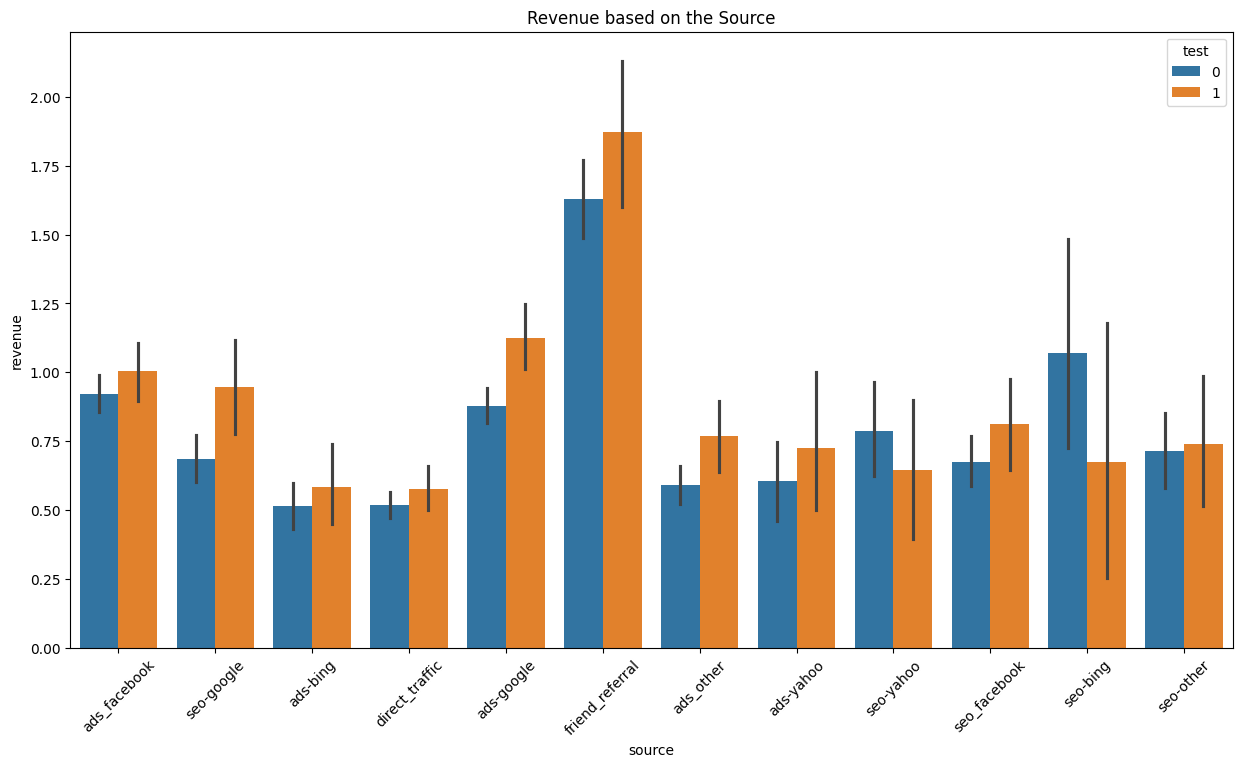

In [134]:
plt.figure(figsize=(15,8))
plt.title("Revenue based on the Source")
sns.barplot(x='source', y='revenue', hue='test', data=df)
plt.xticks(rotation=45)

Based on the above graph, we can see which sources bring in the most revenue. However, it also shows that, in every source except for two, the $59 price always brings in more revenue than the $39 price. 

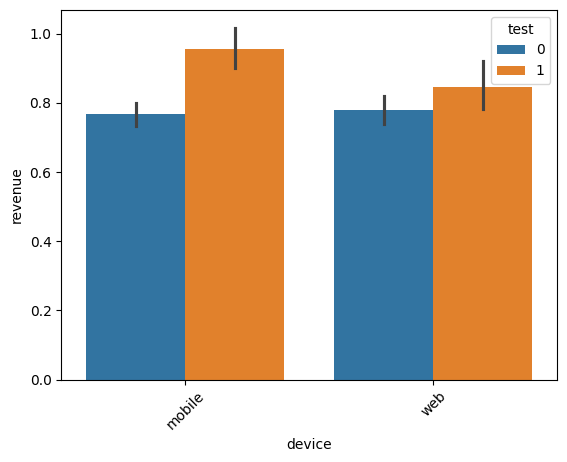

In [135]:
sns.barplot(x='device', y='revenue', hue='test', data=df)
plt.xticks(rotation=45)
plt.show()

This graph also shows that the $59 price also consistently has a greater revenue than the $39 price, even when it comes to the device type. 

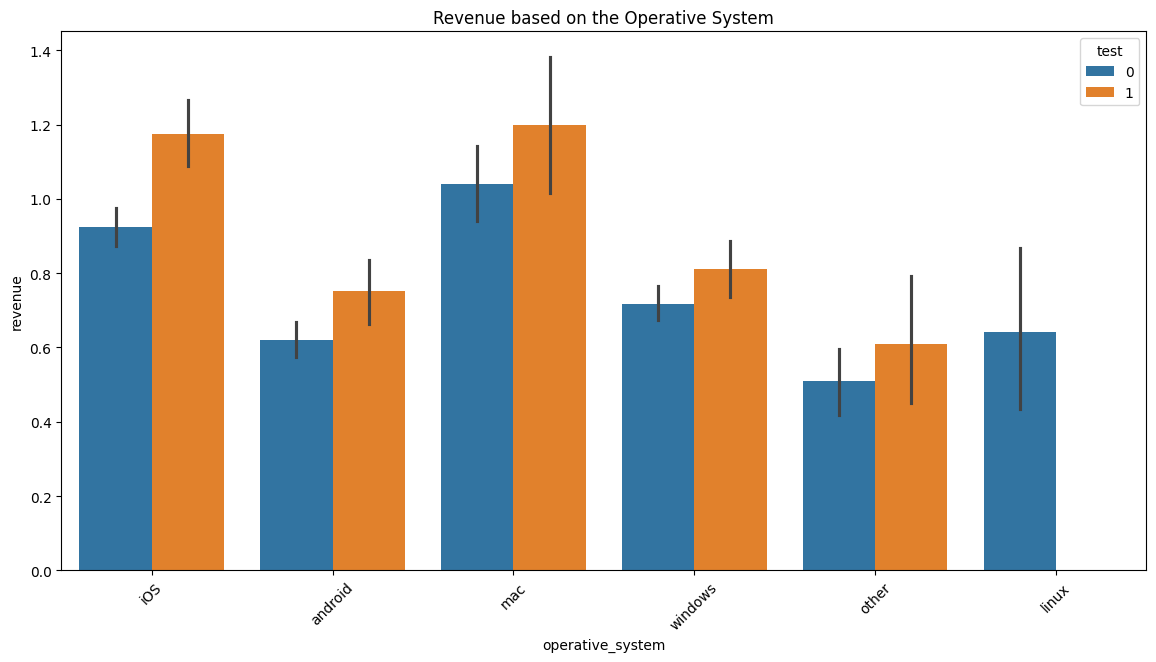

In [136]:
plt.figure(figsize=(14,7))
plt.title("Revenue based on the Operative System")
sns.barplot(x='operative_system', y='revenue', hue='test', data=df)
plt.xticks(rotation=45)
plt.show()

For all web users, the $59 price always brings in more revenue than the $39 price. However, For some reason linux users did not get the $59 price at all. Most people do not use linux, so we'll look into this more and possibly exclude the data

In [137]:
#number of linux users
print(df.query('operative_system==\'linux\'').shape[0]/df.shape[0])

0.013157603196525772


In [138]:
#creating new dataframe with all users except for linux and redoing avg revenue by price
data = df.query('operative_system!=\'linux\'')
print(data[['revenue','test']].groupby('test').mean())

       revenue
test          
0     0.773039
1     0.925638


In [139]:
#redoing results without linux users
print(ttest_ind(data.query('test==1')['revenue'], data.query('test==0')['revenue'], equal_var=False))

TtestResult(statistic=np.float64(5.634429658635216), pvalue=np.float64(1.759411503514855e-08), df=np.float64(155500.3380218927))


In [140]:
#coutning the number of users by city
top_cities = data.groupby('city')['user_id'].nunique().reset_index()

In [141]:
# Sort the cities by the number of unique users in descending order
top_cities_sorted = top_cities.sort_values(by='user_id', ascending=False)

In [142]:
# Get the top 10 cities with the highest user base
top_10_cities = top_cities_sorted.head(10)

In [143]:
# Rename columns for clarity
top_10_cities = top_10_cities.rename(columns={'user_id': 'unique_users'})

In [144]:
print(top_10_cities)

             city  unique_users
552      New York         25000
155       Chicago          6946
376       Houston          6512
723   San Antonio          4488
468   Los Angeles          4037
730      San Jose          3269
385  Indianapolis          3119
394  Jacksonville          2827
629  Philadelphia          2456
440     Las Vegas          2329


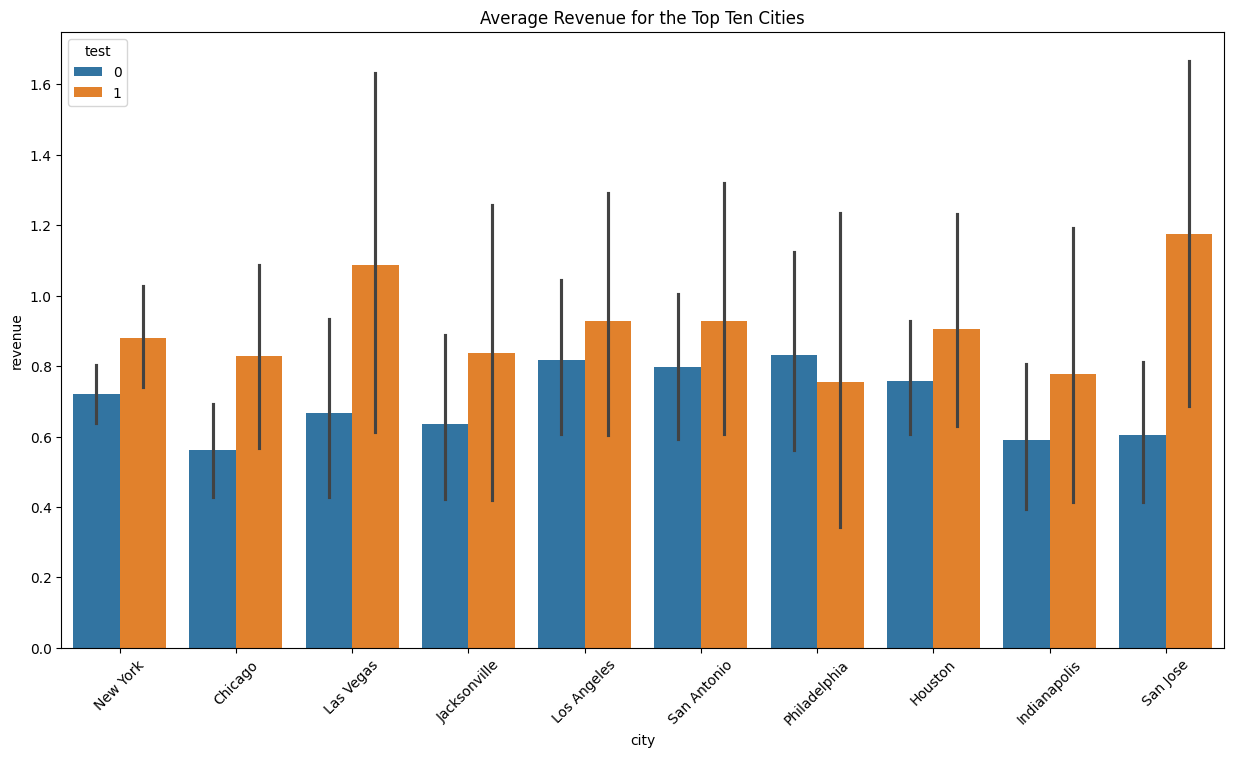

In [145]:
#plotting the revenue for the top cities with the most users
plt.figure(figsize=(15,8))
plt.title("Average Revenue for the Top Ten Cities")

# Use 'city' column from 'top_10_cities' to filter the main dataset
sns.barplot(x='city', y='revenue', hue='test', data=data[data['city'].isin(top_10_cities['city'])])

plt.xticks(rotation=45)
plt.show()

2 

In [146]:
conversion_rate_control = data.query('test==0').converted.mean()
p1_and_p2 = sms.proportion_effectsize(conversion_rate_control, conversion_rate_control*39/59)
sample_size = round(sms.NormalIndPower().solve_power(p1_and_p2, power=0.8, alpha=0.05))
print("The required sample size per group is ~", sample_size)

The required sample size per group is ~ 5571


In [147]:
#create a column that's week of the year
data['week_year'] = data['timestamp'].dt.isocalendar().week
#take avg count of users per week. We remove first and last week, just in case they don't include all 7 days
users_week = data['week_year'].value_counts().sort_index()
users_week = users_week.drop(users_week.index[[0,(users_week.shape[0]-1)]]).mean()
  
print("Avg number of users per week is:", round(users_week))

Avg number of users per week is: 20536


C:\Users\brean\AppData\Local\Temp\ipykernel_2344\3803594377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_year'] = data['timestamp'].dt.isocalendar().week


In [148]:
print("The percentage of traffic that needs to be in test is", round(sample_size/(users_week*2)*100))

The percentage of traffic that needs to be in test is 14


In [149]:
#creating a month column
data['month'] = data['timestamp'].dt.month_name()

C:\Users\brean\AppData\Local\Temp\ipykernel_2344\2400374476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['timestamp'].dt.month_name()


In [150]:
#creating a year column
data['year'] = data['timestamp'].dt.year

C:\Users\brean\AppData\Local\Temp\ipykernel_2344\3261685168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['timestamp'].dt.year


In [151]:
#creating a day column and checking the name dataframe
data['day'] = data['timestamp'].dt.day_name()
data.head()

C:\Users\brean\AppData\Local\Temp\ipykernel_2344\4287358750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['timestamp'].dt.day_name()


,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue,week_year,month,year,day
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0,19,May,2015,Friday
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0,19,May,2015,Sunday
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0,14,April,2015,Saturday
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0,19,May,2015,Thursday
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0,21,May,2015,Sunday


In [152]:
#Group by source and month
testing = data.groupby(['source', 'month', 'test'])['revenue'].sum().unstack(level=-1).fillna(0)
testing

test                       0     1
source          month             
ads-bing        April   2067  1003
                March   2028  1711
                May     2340  1416
ads-google      April   8892  5959
                March   9438  7198
                May     9867  7493
ads-yahoo       April    624   590
                March    819   590
                May     1014   531
ads_facebook    April   9282  4661
                March   7098  5723
                May    10257  6195
ads_other       April   3900  2124
                March   2886  2242
                May     2847  2596
direct_traffic  April   5343  2891
                March   5577  4189
                May     6084  3599
friend_referral April   5967  3422
                March   5616  3953
                May     6396  4720
seo-bing        April    351   177
                March    273   236
                May      585    59
seo-google      April   3003  2301
                March   2535  1770
                May     3198  2478
seo-other       April   1209   472
                March   1053   767
                May     1287   885
seo-yahoo       April   1014   590
                March    741   177
                May     1170   590
seo_facebook    April   2613  1947
                March   2808  1770
                May     2340  1652

<Axes: title={'center': 'Revenue based on the Month'}, xlabel='month', ylabel='revenue'>

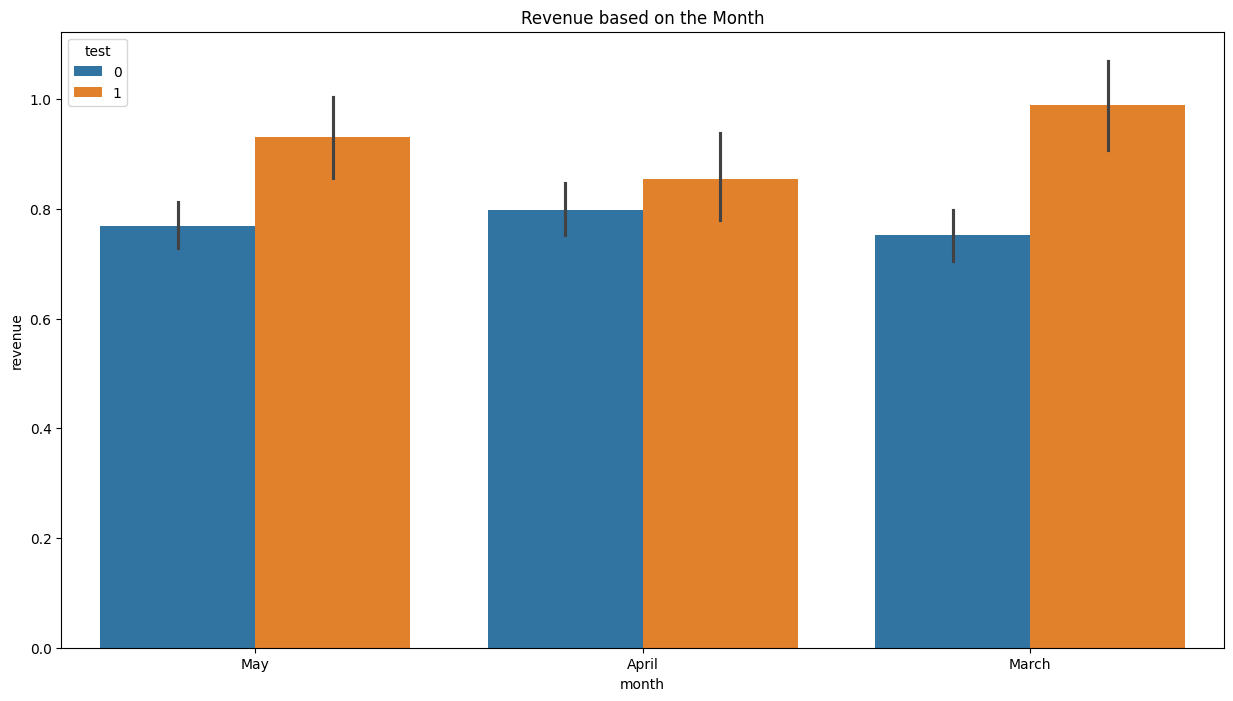

In [153]:
plt.figure(figsize=(15,8))
plt.title("Revenue based on the Month")
sns.barplot(x='month', y='revenue', hue='test', data=data)

Here I was trying to see if the month made any difference in the fluctuation which price that people preferred based on the month, but there was still more revenue made on the $59 price, versus the $39 price. This might differ if this data is taken over a longer period of time, especially around the holidays. People are always looking for good deals or cheaper items during this time. Plus, it's a higher chance that more of an item will be bought if it's a better deal the revenue would be much higher. But, it might be a good idea to leave it at $59 during most of the year, and then using the $39 as a discount price during certain events/holidays but this should be confirmed with data first. 

<Axes: title={'center': 'Revenue based on the Day of the Week'}, xlabel='day', ylabel='revenue'>

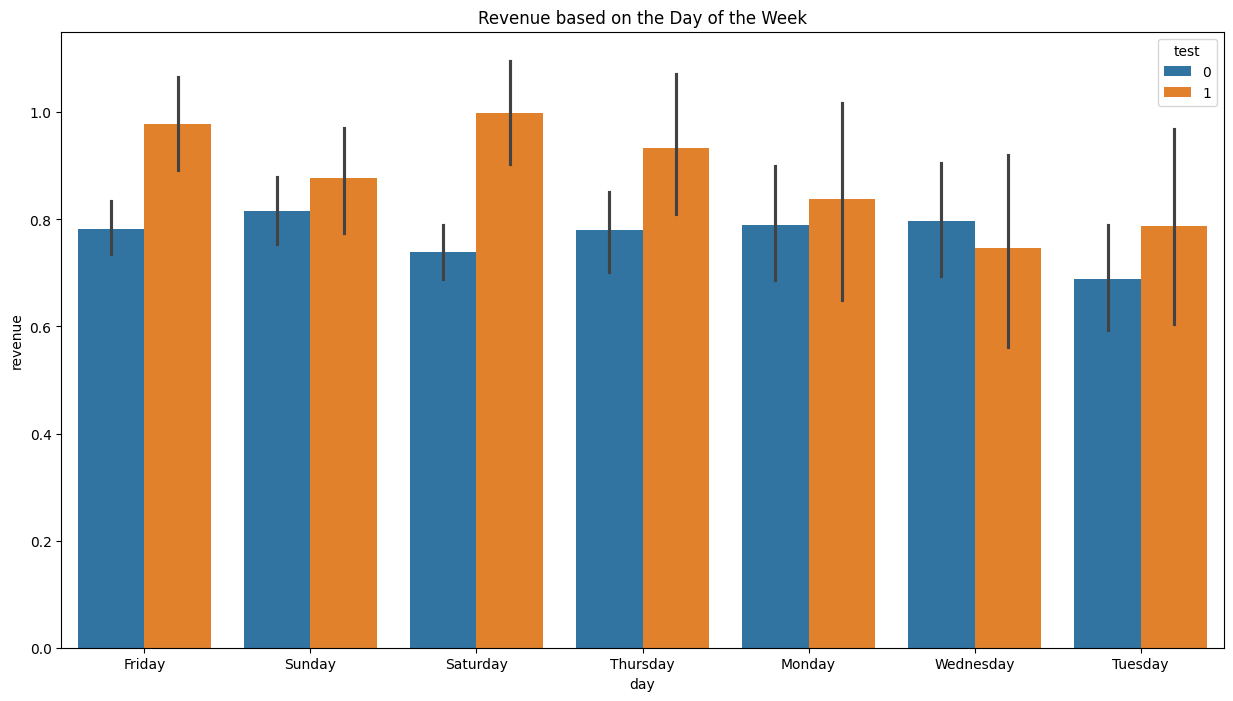

In [154]:
plt.figure(figsize=(15,8))
plt.title("Revenue based on the Day of the Week")
sns.barplot(x='day', y='revenue', hue='test', data=data)

All of the days of the week except for wednesday, have a better revenue with the $59 price. This could be another good chance to have the item normally at $59 but then change the price to $39 on wednesday as a discounted price, to optimize the most of the revenue by using both prices, when it's best suited. By doing this semi-regularly, this will also be a good chance for people who can't normally afford the item to be able to get it, opening up to many more customers, while still optimizing the most revenue possible. 